# Problem Formulation

**Problem:** According to information about the dating , we want to predict the probability that the dating will lead to a successful match or not.

**Inputs:** 191 features

**Output:** Correlation between 2 poeple is success or not

**Function required:** Classification & Prediction

**Challenges:**

* 1- NaN values.
* 2- Pipline
* 3- Determine siutable Classifier
* 4- Determine unimportant columns
* 6- Select optimal hyperparameters in each algorithm.
* 7- Find best accuracy

# What data mining function is required?

binary classification using pipelines,grid search,Random Search and Bayesian Search

# What is the impact?

If the model predicts the relationship between two people correctly, this means they will not wait to know if the relationship between two people is correct or not, as the model will tell them the relation before the event, so they can save time waiting to know if the relationship is successful or not.

# What is the ideal solution?

An ideal solution in my opinion will be measured in terms of metrics and performances
in my code the solution is :- 
The XGclassifier model is the best solution by using Bayesian search.


# 🙂🙂🙂🙂🙂

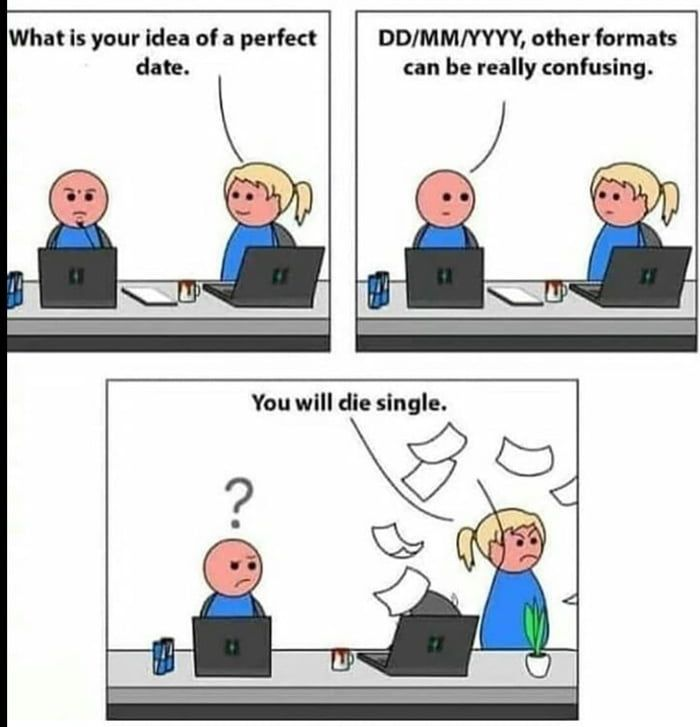![image.png](
  
)

# When the programmer goes to a date 😢😦

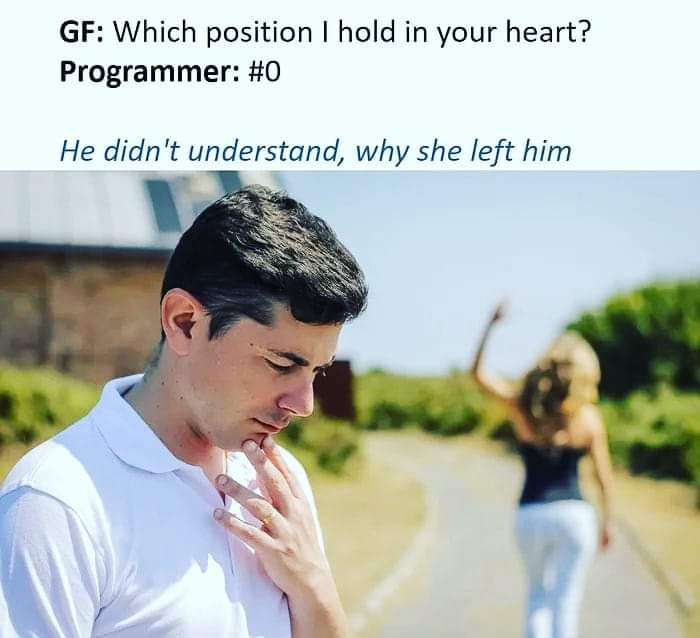

In [ ]:
#liberaries will be used during all models
from skopt import BayesSearchCV
import pandas as pd
import numpy as np
from sklearn import preprocessing
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.ensemble import RandomForestClassifier
from skopt import BayesSearchCV
from skopt.space import Real, Categorical, Integer
from sklearn.model_selection import train_test_split, GridSearchCV,RandomizedSearchCV
from xgboost.sklearn import XGBClassifier


     

In [ ]:
#Load the training dataset 
df_train  = pd.read_csv("/kaggle/input/cisc-873-dm-w23-a2/train.csv" )


In [ ]:
# show the first rows from the training dataset
df_train.head()

,gender,idg,condtn,wave,round,position,positin1,order,partner,pid,...,sinc3_3,intel3_3,fun3_3,amb3_3,attr5_3,sinc5_3,intel5_3,fun5_3,amb5_3,id
0,0,3,2,14,18,2,2.0,14,12,372.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2583
1,1,14,1,3,10,2,NaN,8,8,63.0,...,8.0,8.0,7.0,8.0,NaN,NaN,NaN,NaN,NaN,6830
2,1,14,1,13,10,8,8.0,10,10,331.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4840
3,1,38,2,9,20,18,13.0,6,7,200.0,...,9.0,8.0,8.0,6.0,NaN,NaN,NaN,NaN,NaN,5508
4,1,24,2,14,20,6,6.0,20,17,357.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4828


In [ ]:
# describe the data to know count , mean , min , 25% , 50% , 75% and Max for each row
df_train.describe()

,gender,idg,condtn,wave,round,position,positin1,order,partner,pid,...,sinc3_3,intel3_3,fun3_3,amb3_3,attr5_3,sinc5_3,intel5_3,fun5_3,amb5_3,id
count,5909.000000,5909.000000,5909.000000,5909.000000,5909.000000,5909.000000,4591.000000,5909.00000,5909.000000,5901.000000,...,2804.000000,2804.000000,2804.000000,2804.000000,1413.000000,1413.000000,1413.000000,1413.000000,1413.000000,5909.000000
mean,0.505331,17.360298,1.824843,11.347436,16.850228,9.001523,9.254846,8.91166,8.962938,283.733266,...,8.105563,8.377318,7.644437,7.398716,6.799717,7.631989,7.944798,7.162774,7.092711,4191.314943
std,0.500014,10.947542,0.380133,6.011495,4.389246,5.482368,5.611803,5.45710,5.500706,158.993002,...,1.601011,1.459013,1.757559,1.956924,1.535768,1.498024,1.320919,1.687431,1.713729,2408.009173
min,0.000000,1.000000,1.000000,1.000000,5.000000,1.000000,1.000000,1.00000,1.000000,1.000000,...,2.000000,3.000000,2.000000,1.000000,2.000000,2.000000,4.000000,1.000000,1.000000,0.000000
25%,0.000000,8.000000,2.000000,7.000000,14.000000,4.000000,4.000000,4.00000,4.000000,153.000000,...,7.000000,8.000000,7.000000,6.000000,6.000000,7.000000,7.000000,6.000000,6.000000,2124.000000
50%,1.000000,16.000000,2.000000,11.000000,18.000000,8.000000,9.000000,8.00000,8.000000,280.000000,...,8.000000,8.000000,8.000000,8.000000,7.000000,8.000000,8.000000,7.000000,7.000000,4210.000000
75%,1.000000,26.000000,2.000000,15.000000,20.000000,13.000000,14.000000,13.00000,13.000000,409.000000,...,9.000000,9.000000,9.000000,9.000000,8.000000,9.000000,9.000000,8.000000,8.000000,6266.000000
max,1.000000,44.000000,2.000000,21.000000,22.000000,22.000000,22.000000,22.00000,22.000000,552.000000,...,12.000000,12.000000,12.000000,12.000000,10.000000,10.000000,10.000000,10.000000,10.000000,8372.000000


In [ ]:
# print shape of data to know number of rows and columns
print("Size/Shape of the dataset: ",df_train.shape)   

Size/Shape of the dataset:  (5909, 192)


In [ ]:
df_train.info(verbose=True,null_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5909 entries, 0 to 5908
Data columns (total 192 columns):
 #    Column    Non-Null Count  Dtype  
---   ------    --------------  -----  
 0    gender    5909 non-null   int64  
 1    idg       5909 non-null   int64  
 2    condtn    5909 non-null   int64  
 3    wave      5909 non-null   int64  
 4    round     5909 non-null   int64  
 5    position  5909 non-null   int64  
 6    positin1  4591 non-null   float64
 7    order     5909 non-null   int64  
 8    partner   5909 non-null   int64  
 9    pid       5901 non-null   float64
 10   match     5909 non-null   int64  
 11   int_corr  5800 non-null   float64
 12   samerace  5909 non-null   int64  
 13   age_o     5844 non-null   float64
 14   race_o    5861 non-null   float64
 15   pf_o_att  5850 non-null   float64
 16   pf_o_sin  5850 non-null   float64
 17   pf_o_int  5850 non-null   float64
 18   pf_o_fun  5843 non-null   float64
 19   pf_o_amb  5836 non-null   float64
 20   pf_o_s

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: null_counts is deprecated. Use show_counts instead
  """Entry point for launching an IPython kernel.


In [ ]:
# To check if the data have null values or not
print("Checking for null values:\n",df_train.isnull().sum()) 

Checking for null values:
 gender         0
idg            0
condtn         0
wave           0
round          0
            ... 
sinc5_3     4496
intel5_3    4496
fun5_3      4496
amb5_3      4496
id             0
Length: 192, dtype: int64


In [ ]:
# To check the data type for each column in dataset
print("Checking Data-type of each column:\n",df_train.dtypes)

Checking Data-type of each column:
 gender        int64
idg           int64
condtn        int64
wave          int64
round         int64
             ...   
sinc5_3     float64
intel5_3    float64
fun5_3      float64
amb5_3      float64
id            int64
Length: 192, dtype: object


# Check the data for duplicates

In [ ]:
# To make check for any duplication data
df_train.duplicated().any()

False

In [ ]:
# here will drop if there duplicated data but in our training dataset there is not d
df_train.drop_duplicates(inplace=True)

In [ ]:
# copy training data in df 
df = df_train.copy()

In [ ]:
# To show the shape of df
df.shape

(5909, 192)

In [ ]:
#I will drop any Id and partner Columns
df.drop(['id', 'idg','partner', 'pid'], axis=1, inplace = True)
     

In [ ]:
# to show the shape of training data after drop some columns
df.shape

(5909, 188)

#gender

I'm going to do some operations on the column (gender) before training the model

In [ ]:
# To count null values in gender column
df['gender'].isnull().sum() # the result is 0 that means the gender column not contain null values.

0

In [ ]:
# the line Show the data type of gender column
df['gender'].dtypes

dtype('int64')

gender is int but should be category because 0 represent female and 1 represent male

In [ ]:
# To convert from intger to category
df["gender"] = df['gender'].astype('category')

In [ ]:
# to make sure that the gender column is converted to category
df['gender'].dtypes

CategoricalDtype(categories=[0, 1], ordered=False)

# condtn
I'm going to do some operations on the column (condtn) before training the model

In [ ]:
# To count null values in condtn column
df['condtn'].isnull().sum()# the result is 0 that means the condtn column not contain null values.

0

condtn


---



*   1 = > for limited choice
*  2 = > for  extensive choice





In [ ]:
# To count the number of 1's  and the number of 2's in condtn column
df['condtn'].value_counts()

2    4874
1    1035
Name: condtn, dtype: int64

condtn the type of condtn is int but should be category because 1 represent limited choice and 2 represent extensive choice



In [ ]:
# To convert from intger to category
df["condtn"] = df['condtn'].astype('category')

In [ ]:
# to make sure that the condtn column is converted to category
df["condtn"].dtypes

CategoricalDtype(categories=[1, 2], ordered=False)

# wave

I'm going to do some operations on the column (wave) before training the model

In [ ]:
# To count null values in wave column
df['wave'].isnull().sum() # the result is 0 that means the wave column not contain null values.

0

In [ ]:
# the line Show the data type of wave column
df['wave'].dtypes

dtype('int64')

In [ ]:
df['wave'].value_counts()

21    672
11    631
9     571
14    503
15    481
4     459
2     425
7     346
19    335
12    263
17    188
3     150
1     146
5     138
8     137
13    126
10    113
16     73
20     66
18     52
6      34
Name: wave, dtype: int64

# round

I'm going to do some operations on the column (round) before training the model

In [ ]:
# To count null values in wave column
df['round'].isnull().sum()

0

In [ ]:
# the line Show the data type of round column
df['round'].dtypes

dtype('int64')

In [ ]:
# To find the  count of the same numbers in the column
df['round'].value_counts()

18    936
20    826
22    672
10    636
21    631
16    553
19    470
14    351
15    335
9     174
6     122
11    100
8      37
5      34
7      32
Name: round, dtype: int64

# zipcode

I'm going to do some operations on the column (zipcodde) before training the model

In [ ]:
# to show the zipcode column
df['zipcode']

0          NaN
1        2,021
2          NaN
3       10,471
4       66,208
         ...  
5904    11,803
5905       NaN
5906    98,115
5907       NaN
5908     2,140
Name: zipcode, Length: 5909, dtype: object

In [ ]:
# To count null values in zipcode column
df['zipcode'].isnull().sum() # it contain 720 so it is a big problem

720

In [ ]:
# the line Show the data type of zipcode column
df["zipcode"].dtypes 

dtype('O')

In [ ]:
# to replace the ',' the the data by ''
df["zipcode"] = df['zipcode'].str.replace(',','').astype('float') 

In [ ]:
# To convert zipcode to category
df["zipcode"] = df['zipcode'].astype('category')


# Form

In [ ]:
# to show the from column
df["from"]

0        Palo Alto, CA
1           Boston, MA
2        Bombay, India
3       Washington, DC
4          Midwest USA
             ...      
5904          New York
5905          Colombia
5906           Seattle
5907            Canada
5908     Cambridge, MA
Name: from, Length: 5909, dtype: object

In [ ]:
# To count null values in wave column
df['from'].isnull().sum()

58

"from" and "zipcode" is equlivant so drop "from" because it is categorical and have too varied values to be able to gain insight

In [ ]:
# drop the form column from the training dataset
df.drop(['from'], axis=1, inplace = True)

# career_c

* 1= Lawyer
* 2= Academic/Research
* 3= Psychologist
* 4= Doctor/Medicine
* 5=Engineer
* 6= Creative Arts/Entertainment
* 7= Banking/Consulting/Finance/Marketing/Business/CEO/Entrepreneur/Admin
* 8= Real Estate
* 9= International/Humanitarian Affairs
* 10= Undecided
* 11=Social Work
* 12=Speech Pathology
* 13=Politics
* 14=Pro sports/Athletics
* 15=Other
* 16=Journalism
* 17=Architecture


In [ ]:
# To count null values in career_c column
df['career_c'].isnull().sum()

100

In [ ]:
# the line Show the data type of career_c column
df['career_c'].dtypes

dtype('float64')

In [ ]:
#I think we should convert careeer_c from float to category
df["career_c"] = df['career_c'].astype('category')

# career

In [ ]:
# to show the career column
df['career']

0                    University President
1       Engineer or iBanker or consultant
2                  Real Estate Consulting
3                          public service
4                               undecided
                      ...                
5904                         Psychologist
5905                           Consulting
5906                              Teacher
5907    pharmaceuticals and biotechnology
5908                              Actress
Name: career, Length: 5909, dtype: object

In [ ]:
# To count null values in career column
df['career'].isnull().sum()

64

"career_c" is equlivant to "career",so drop "career"

In [ ]:
# to drop career fron traing dataset
df.drop(['career'], axis=1, inplace = True)

# field_cd

In [ ]:
# show the unique values in field_c
df['field_cd'].unique()

array([ 9.,  5., 13.,  8., 16., 10.,  3.,  1.,  2., 18.,  7., 11., 14.,
        4.,  6., 15., 17., 12., nan])

In [ ]:
# to show the field_cd column
df['field_cd']

0        9.0
1        5.0
2        5.0
3       13.0
4        8.0
        ... 
5904     3.0
5905     8.0
5906     9.0
5907    10.0
5908    15.0
Name: field_cd, Length: 5909, dtype: float64

In [ ]:
# To count null values in field_cd column
df['field_cd'].isnull().sum()

59

In [ ]:
# convert field_cd from float to category
df["field_cd"] = df['field_cd'].astype('category')

# field

In [ ]:
# to show the field column
df['field']

0       Ed.D. in higher education policy at TC
1                                  Engineering
2                               Urban Planning
3                        International Affairs
4                                     Business
                         ...                  
5904                       Clinical Psychology
5905                                       MBA
5906                      MA Science Education
5907                              Biochemistry
5908                        MFA Acting Program
Name: field, Length: 5909, dtype: object

In [ ]:
# To count null values in field column
df['field'].isnull().sum()

45

"field_cd" is equlivant to "career",so drop "field"

In [ ]:
# drop field_cd from training dataset
df.drop(['field'],inplace=True, axis=1)

# income

In [ ]:
# to show the income column
df['income']

0             NaN
1             NaN
2             NaN
3       45,300.00
4       46,138.00
          ...    
5904    65,708.00
5905          NaN
5906    37,881.00
5907          NaN
5908          NaN
Name: income, Length: 5909, dtype: object

In [ ]:
# To count null values in income column
df['income'].isnull().sum()

2862

In [ ]:
# replace ',' in the data of column income to ''
df["income"] = df['income'].str.replace(',','').astype('float')

# mn_sat

In [ ]:
# to show the mn_sat column
df['mn_sat']

0       1,290.00
1            NaN
2            NaN
3            NaN
4       1,400.00
          ...   
5904         NaN
5905         NaN
5906    1,155.00
5907         NaN
5908    1,280.00
Name: mn_sat, Length: 5909, dtype: object

In [ ]:
# To count null values in mn_sat column
df['mn_sat'].isnull().sum()

3674

In [ ]:
# replace ',' in the data of column mn_sat to ''
df["mn_sat"] = df['mn_sat'].str.replace(',','').astype('float')

# tuition

In [ ]:
# to show the tuition column
df['tuition']

0       21,645.00
1             NaN
2             NaN
3             NaN
4       26,019.00
          ...    
5904          NaN
5905          NaN
5906    13,258.00
5907          NaN
5908    27,350.00
Name: tuition, Length: 5909, dtype: object

In [ ]:
# To count null values in tuition column
df['tuition'].isnull().sum()

3365

In [ ]:
# replace ',' in the data of column tuition to ''
df["tuition"] = df['tuition'].str.replace(',','').astype('float')

# go_out

In [ ]:
# to show the go_out column

df['go_out']

0       3.0
1       1.0
2       2.0
3       4.0
4       2.0
       ... 
5904    2.0
5905    2.0
5906    1.0
5907    2.0
5908    2.0
Name: go_out, Length: 5909, dtype: float64

In [ ]:
# To count null values in go_out column
df['go_out'].isnull().sum()

58

In [ ]:
# show the unique values in go_out column
df['go_out'].unique()

array([ 3.,  1.,  2.,  4.,  5., nan,  6.,  7.])

How often do you go out (not necessarily on dates)?
* Several times a week=1
* Twice a week=2
* Once a week=3
* Twice a month=4
* Once a month=5
* Several times a year=6
* Almost never=7


In [ ]:
# I think we should Subtract 8 from go_out To get large weight for more times they go out 
df['go_out']= 8 - df['go_out']

In [ ]:
# to make sure that the above operation is applayed
df['go_out'].unique()

array([ 5.,  7.,  6.,  4.,  3., nan,  2.,  1.])

# date

In [ ]:
# to show the date column
df['date']

0       6.0
1       6.0
2       4.0
3       5.0
4       5.0
       ... 
5904    3.0
5905    7.0
5906    6.0
5907    6.0
5908    3.0
Name: date, Length: 5909, dtype: float64

In [ ]:
# To count null values in wave column
df['date'].isnull().sum()

72

In [ ]:
# find unique values in date column
df['date'].unique()

array([ 6.,  4.,  5.,  7.,  3.,  2.,  1., nan])

In general, how frequently do you go on dates?
* Several times a week=1
* Twice a week=2
* Once a week=3
* Twice a month=4
* Once a month=5
* Several times a year=6
* Almost never=7


In [ ]:
# I think we should Subtract 8 from go_out To get large weight for more times they go out 
df['date']= 8 - df['date']

In [ ]:
# to make sure that the above operation is applayed
df['date'].unique()

array([ 2.,  4.,  3.,  1.,  5.,  6.,  7., nan])

# samerace

In [ ]:
# to show the samerace column

df['samerace']

0       0
1       0
2       0
3       1
4       0
       ..
5904    1
5905    0
5906    0
5907    0
5908    0
Name: samerace, Length: 5909, dtype: int64

In [ ]:
# To count null values in samerace column
df['samerace'].isnull().sum()

0

In [ ]:
# find unique values in samerace column
df['samerace'].unique()

array([0, 1])

In [ ]:
# To find the  count of 0's and 1's in samerace column
df['samerace'].value_counts()

0    3567
1    2342
Name: samerace, dtype: int64

amerace participant and the partner were the same race. 1= yes, 0=no the type of samerace is int but should be category because 0 represent not same race and 1 represent same race

In [ ]:
# to convert the datatype of samerace from integer to category
df["samerace"] = df['samerace'].astype('category')

# race

In [ ]:
# to show the race column
df['race']

0       3.0
1       2.0
2       6.0
3       2.0
4       2.0
       ... 
5904    2.0
5905    3.0
5906    6.0
5907    4.0
5908    2.0
Name: race, Length: 5909, dtype: float64

In [ ]:
# To count null values in race column
df['race'].isnull().sum()

45

In [ ]:
# To find the  count of the same numbers in the column
df['race'].value_counts()

2.0    3313
4.0    1424
3.0     483
6.0     350
1.0     294
Name: race, dtype: int64

In [ ]:
# to replace  values of 6's by 5's
df['race']= df['race'].replace([6],5) # 6's are error in the dataset

In [ ]:
# to make sure that the aboe cell is done
df['race'].value_counts()

2.0    3313
4.0    1424
3.0     483
5.0     350
1.0     294
Name: race, dtype: int64

race the type of race is float but should be category because 
* Black/African American=1 
* European/Caucasian-American=2 
* Latino/Hispanic American=3 
* Asian/Pacific Islander/Asian-American=4 
* Other=5

In [ ]:
df["race"] = df['race'].astype('category')

# race_o

In [ ]:
# to show the race_o column
df['race_o']

0       2.0
1       4.0
2       2.0
3       2.0
4       4.0
       ... 
5904    2.0
5905    2.0
5906    2.0
5907    2.0
5908    4.0
Name: race_o, Length: 5909, dtype: float64

In [ ]:
# To count null values in race_o column
df['race_o'].isnull().sum()

48

In [ ]:
# To find the  count of the same numbers in the column race_o
df['race_o'].value_counts()

2.0    3307
4.0    1420
3.0     475
6.0     359
1.0     300
Name: race_o, dtype: int64

the race variable was an integer field, with each number corresponding to a race. In the original dataset, the race “Other” was listed as the number 6. Since there was no race with the number 5, we changed all race variables labeled “Other” from 6 to 5.

In [ ]:
# to replace '6' to '5'
df['race_o']= df['race_o'].replace([6],5)

In [ ]:
# To find the  count of the same numbers in the column after replace 6 by 5
df['race_o'].value_counts()

2.0    3307
4.0    1420
3.0     475
5.0     359
1.0     300
Name: race_o, dtype: int64

In [ ]:
# convert the type of column from integer to category
df["race_o"] = df['race_o'].astype('category')

# goaL

In [ ]:
# to show the goal column
df['goal']

0       1.0
1       5.0
2       1.0
3       2.0
4       2.0
       ... 
5904    3.0
5905    1.0
5906    1.0
5907    2.0
5908    1.0
Name: goal, Length: 5909, dtype: float64

In [ ]:
# To count null values in goal column
df['goal'].isnull().sum()

58

In [ ]:
# To find the count of the same numbers in the column goal
df['goal'].value_counts()

1.0    2406
2.0    2131
3.0     443
5.0     369
6.0     294
4.0     208
Name: goal, dtype: int64

In [ ]:
# convert the type of column from integer to category
df["goal"] = df['goal'].astype('category')

# undergra

In [ ]:
# to show the undergra column
df['undergra']

0                       University of Michigan-Ann Arbor
1                                                    NaN
2       Rizvi College of Architecture, Bombay University
3                                                    NaN
4                                        Harvard College
                              ...                       
5904                                                 NaN
5905                                                 NaN
5906                            University of Washington
5907                                                 NaN
5908                                    Hamilton College
Name: undergra, Length: 5909, dtype: object

In [ ]:
# To count null values in wave column
df['undergra'].isnull().sum()

2442

In [ ]:
# drop undergra column becouse i think it isn't useful
df.drop(['undergra'], axis=1, inplace = True)

show numerical and categorical data

In [ ]:
# show shape of traing dataset after doing some operation in some columns in training dataset
df.shape

(5909, 184)

In [ ]:
# to find the numerical data in the training 
df_numeric = df.select_dtypes(include=np.number)

In [ ]:
# show the shape of df_numeric that show how many column are represented as number 
df_numeric.shape

(5909, 175)

In [ ]:
# to find the categorg data in the training 
df_cat=df.select_dtypes(include =['category'])
  

In [ ]:
# show the shape of df_cat that show how many column are represented as category 
df_cat.shape

(5909, 9)

# test data set

 all operation that we do in training data , We will apply it also in test data

In [ ]:
# load test data
test = pd.read_csv("/kaggle/input/cisc-873-dm-w23-a2/test.csv" )

In [ ]:
# to save column id in submission befor delete it from test dataset
submission = pd.DataFrame()
submission['id'] = test['id']

In [ ]:
# show the shape of test data
test.shape

(2469, 191)

In [ ]:
# drop ids columns from test data set
test.drop(['id', 'idg','partner', 'pid'], axis=1, inplace = True)
# convert data type of column gender to category
test["gender"] = test['gender'].astype('category')
# convert data type of column condtn to category
test["condtn"] = test['condtn'].astype('category')
test.drop(['from'], axis=1, inplace = True)
test.drop(['career'],inplace=True, axis=1)
# convert data type of column career_c to category
test["career_c"] = test['career_c'].astype('category')
test.drop(['field'],inplace=True, axis=1)
# convert data type of column field_cd to category
test["field_cd"] = test['field_cd'].astype('category')
# replace ',' to '' in mn_sat column 
test["mn_sat"] = test['mn_sat'].str.replace(',','').astype('float')
# replace ',' to '' in income column 
test["income"] = test['income'].str.replace(',','').astype('float')
# replace ',' to '' in tuition column 
test["tuition"] = test['tuition'].str.replace(',','').astype('float')
# convert data type of column goal to category
test["goal"] = test['goal'].astype('category')
# convert data type of column race_o to category
test["race_o"] = test['race_o'].astype('category')
# convert data type of column race to category
test["race"] = test['race'].astype('category')
# replace 6 to 5 in race_o column 
test['race_o']= test['race_o'].replace([6],5)
# replace 6 to 5 in race column 
test['race']= test['race'].replace([6],5)
# convert data type of column samerace to category
test["samerace"] = test['samerace'].astype('category')
test['date']=8-test['date']
test['go_out']=8-test['go_out']
# drop undergra
test.drop(['undergra'], axis=1, inplace = True)
# replace ',' to '' in zipcode column 
test["zipcode"] = test['zipcode'].str.replace(',','').astype('float')
# convert data type of column zipcode to category
test["zipcode"] = test['zipcode'].astype('category')
     

In [ ]:
# show shape of test after do some operation
test.shape

(2469, 183)

# Split Data

In [ ]:
# save df without match in X [because match is the target column]
X=df.loc[:, df.columns != 'match']

In [ ]:
# save the lagel or target column in y
y=df['match']

In [ ]:
# split training data for 80% train and 20% test
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2 ,random_state=42)

In [ ]:
#show the shape of X_train
print("X_train shape   ",X_train.shape)
#show the shape of y_train
print("y_train shape   ",y_train.shape)
#show the shape of X_val
print("X_val shape     ",X_val.shape)
#show the shape of y_val
print("y_val shape     ",y_val.shape)

X_train shape    (4727, 183)
y_train shape    (4727,)
X_val shape      (1182, 183)
y_val shape      (1182,)


# GridSearch trail_1   XGBClassifier as classifier

In [ ]:
#Sparate numerical and categorical features in the training data

# put numeric feature in feature_numeric list
features_numeric=list(X_train.select_dtypes(include=['float64','int64']))

#put categoric features in feature_cat list
features_cat=list(X_train.select_dtypes(include=['category']))
# print each list to know the column's name in each list.
print('numeric features:', features_numeric)
print('categorical features:', features_cat)

numeric features: ['wave', 'round', 'position', 'positin1', 'order', 'int_corr', 'age_o', 'pf_o_att', 'pf_o_sin', 'pf_o_int', 'pf_o_fun', 'pf_o_amb', 'pf_o_sha', 'attr_o', 'sinc_o', 'intel_o', 'fun_o', 'amb_o', 'shar_o', 'like_o', 'prob_o', 'met_o', 'age', 'mn_sat', 'tuition', 'imprace', 'imprelig', 'income', 'date', 'go_out', 'sports', 'tvsports', 'exercise', 'dining', 'museums', 'art', 'hiking', 'gaming', 'clubbing', 'reading', 'tv', 'theater', 'movies', 'concerts', 'music', 'shopping', 'yoga', 'exphappy', 'expnum', 'attr1_1', 'sinc1_1', 'intel1_1', 'fun1_1', 'amb1_1', 'shar1_1', 'attr4_1', 'sinc4_1', 'intel4_1', 'fun4_1', 'amb4_1', 'shar4_1', 'attr2_1', 'sinc2_1', 'intel2_1', 'fun2_1', 'amb2_1', 'shar2_1', 'attr3_1', 'sinc3_1', 'fun3_1', 'intel3_1', 'amb3_1', 'attr5_1', 'sinc5_1', 'intel5_1', 'fun5_1', 'amb5_1', 'attr', 'sinc', 'intel', 'fun', 'amb', 'shar', 'like', 'prob', 'met', 'match_es', 'attr1_s', 'sinc1_s', 'intel1_s', 'fun1_s', 'amb1_s', 'shar1_s', 'attr3_s', 'sinc3_s', 'int

In [ ]:
from pandas.core.arrays import numeric
# Built pipline

# Create a pipline for numerical features and select it's hyperparameters
numeric=Pipeline(
    steps=[
        # SimpleImputer used to handel missing value and have strategy='mean' is default val that means fill nan value with mean
           ('imputer', SimpleImputer()), 
            # StandardScaler used to scale number
           ('scaler', StandardScaler()) 
    ]
)
categorical=Pipeline(
    steps=[
        # SimpleImputer used to handel missing value and have strategy='constant' that means fill nan value with constant
           ('imputer',SimpleImputer(strategy='constant')), 
           # OneHotEncoder used to encode categorical data
            ('onehot',OneHotEncoder(handle_unknown='ignore'))
    ]
)

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric, features_numeric),# Numerical data
        ('cat', categorical, features_cat) # Categorical data
    ]
)
# Put the preprocessing a siutable classifier.
full_pipline = Pipeline(  
    steps=[
        ('preprocessor', preprocessor), 
        ('my_classifier', 
           RandomForestClassifier(), # I used RandomForestClassifier as a classifier.
        )
    ]
)
full_pipline


np.random.seed(0)  # used to make the random numbers predictable

In [ ]:
from sklearn import preprocessing
# Put the preprocessing a siutable classifier.
full_pipline = Pipeline(  
    steps=[
        ('preprocessor', preprocessor),
        # I used XGBClassifier as a classifier.
        ('my_classifier', XGBClassifier(), )
    ]
)
full_pipline

 # used to make the random numbers predictable
np.random.seed(0) 

In [ ]:
# fit pipline 
full_pipline = full_pipline.fit(X_train, y_train)
# predict pipline
full_pipline.predict(X_val)

array([0, 0, 0, ..., 0, 0, 0])

In [ ]:
param_grid = {
      # used to determine strategy value = mean to fill NaN values
    'preprocessor__num__imputer__strategy': ['mean'],
         # n_estimators is the total number of trees in the forest.
    'my_classifier__n_estimators': [20, 30, 40],  
 
  # max_depth determines how many features should be considered when looking for a split.
    'my_classifier__max_depth':[10, 20, 30]    
   
   
}

grid_search = GridSearchCV(
    full_pipline, param_grid, cv=2, verbose=1, n_jobs=2, 
    scoring='roc_auc')# n_job is a number of jobs to run in parallel.
# cv=2 means two-fold cross-validation

# Fitting the model after grid search
grid_search.fit(X_train, y_train)
# best_score_ is a best estimator score on the data on the left.
# best_params_ is a setting of parameters that produced the best results on the hold out data.
print('best score {}'.format(grid_search.best_score_))
print('best score {}'.format(grid_search.best_params_))

Fitting 2 folds for each of 9 candidates, totalling 18 fits
best score 0.8460530987305526
best score {'my_classifier__max_depth': 10, 'my_classifier__n_estimators': 40, 'preprocessor__num__imputer__strategy': 'mean'}


In [ ]:
# Use this cell to write the result in the csv  to submit this file in kaggel .
submission['match'] = grid_search.predict_proba(test)[:,1]
submission.to_csv('grid_search.csv', index=False)

# **Trail_1**

# Expectation
I expect to get the optimal hyperparamters that will give me the best performance and highest accuracy using random forest model with grid search and cross validation

# Observation
After running the code,the best hyperparameters that was defined by the grid search using cross validation were :

'my_classifier__max_depth': 10,

'my_classifier__n_estimators': 40,

'preprocessor__num__imputer__strategy': 'mean'

best accuracy is :- 0.8460530987305526

# plan

I'm going to set different ranges for the hyperparameters in the grid search with cross validation

'my_classifier__n_estimators': [ 40, 50 , 70],  

'my_classifier__max_depth':[5 , 7 ,10, ]  
  
and make classifier RandomForestClassifier




# GridSearch trail_2  RandomForestClassifier as classifier


In [ ]:
full_pipline = Pipeline(  
    # Put the preprocessing a siutable classifier.
    steps=[
        ('preprocessor', preprocessor), 
        ('my_classifier', 
           RandomForestClassifier(), # I used RandomForestClassifier as a classifier.
        )
    ]
)
full_pipline

 # used to make the random numbers predictable
np.random.seed(0)

In [ ]:
# Fitting and predict The pipeline object.
full_pipline = full_pipline.fit(X_train, y_train)
full_pipline.predict(X_val)

array([0, 0, 0, ..., 0, 0, 0])

In [ ]:

param_grid = {
   
    # used to determine strategy value = mean to fill NaN values
    'preprocessor__num__imputer__strategy': ['mean'],


     # n_estimators is the total number of trees in the forest.
    'my_classifier__n_estimators': [ 40, 50 , 70],  
    
    # max_depth determines how many features should be considered when looking for a split.
    'my_classifier__max_depth':[5 , 7 ,10, ]    
   
}



grid_search_1 = GridSearchCV(
    full_pipline, param_grid, cv=2, verbose=1, n_jobs=-1, # n_job is a number of jobs to run in parallel
    scoring='roc_auc')
# scoring is used to evaluation metric that used when ranking results
# fit data train
grid_search_1.fit(X_train, y_train)
# TO display the best parameter 
print('best score {}'.format(grid_search_1.best_score_))
print('best score {}'.format(grid_search_1.best_params_))

Fitting 2 folds for each of 9 candidates, totalling 18 fits
best score 0.833324452773109
best score {'my_classifier__max_depth': 5, 'my_classifier__n_estimators': 70, 'preprocessor__num__imputer__strategy': 'mean'}


In [ ]:
# Use this cell to write the result in the csv  to submit this file in kaggel .
submission['match'] = grid_search_1.predict_proba(test)[:,1]

submission.to_csv('grid_search_1.csv', index=False)

# **Trail_2**

# Expectation
I expected to get a higher score after using RandomForestClassifierand change in hyperprameter

# Observation
After running the code,the best hyperparameters that was defined by the grid search using cross validation were :

'my_classifier__max_depth': 5,

'my_classifier__n_estimators': 70
 
'preprocessor__num__imputer__strategy': 'mean'

best accuracy is :- 0.833324452773109

# plan

try to use RandomSearch with different hyperparameter
        




# RandomizedSearchCV trail_1 
I used RandomForestClassifier as a classifier.

In [ ]:
full_pipline = Pipeline(  
    steps=[
         # Put the preprocessing a siutable classifier.
        ('preprocessor', preprocessor), 
        ('my_classifier', 
           RandomForestClassifier(), # I used RandomForestClassifier as a classifier.
        )
    ]
)
full_pipline

 # used to make the random numbers predictable
np.random.seed(0)

In [ ]:
param_random = {
     # used to determine strategy value = mean to fill NaN values
    'preprocessor__num__imputer__strategy': ['mean'],
    # n_estimators is the total number of trees in the forest.
    'my_classifier__n_estimators': [30, 40, 50],  
     # max_depth determines how many features should be considered when looking for a split
    'my_classifier__max_depth':[20, 30, 40]     
   
}

# cross-validation is the number of cv folds 
# cv=2 means two-fold cross-validation
random_search = RandomizedSearchCV(
    full_pipline, param_random, cv=4, verbose=1, n_jobs=-1, 
    scoring='roc_auc')
# Fitting the model after grid search
random_search.fit(X_train, y_train)
# best_score_ is a best estimator score on the data on the left.
# best_params_ is a setting of parameters that produced the best results on the hold out data.
print('best score {}'.format(random_search.best_score_))
print('best score {}'.format(random_search.best_params_))
     

/opt/conda/lib/python3.7/site-packages/sklearn/model_selection/_search.py:296: UserWarning: The total space of parameters 9 is smaller than n_iter=10. Running 9 iterations. For exhaustive searches, use GridSearchCV.
  UserWarning,


Fitting 4 folds for each of 9 candidates, totalling 36 fits
best score 0.8238186099114422
best score {'preprocessor__num__imputer__strategy': 'mean', 'my_classifier__n_estimators': 50, 'my_classifier__max_depth': 40}


In [ ]:
# Use this cell to write the result in the csv  to submit this file in kaggel.
submission['match'] = random_search.predict_proba(test)[:,1]

submission.to_csv('random_search.csv', index=False)

# **Trail_3**

# Expectation
I expected to get a higher score after using RandomForestClassifierand change in hyperprameter

# Observation
After running the code,the best hyperparameters that was defined by the Random Search using cross validation were :

'preprocessor__num__imputer__strategy': 'mean',

 'my_classifier__n_estimators': 50, 

 'my_classifier__max_depth': 40

best accuracy is :- 0.8238186099114422

# plan

I'm going to set different ranges for the hyperparameters in the grid search with cross validation

'my_classifier__n_estimators': [20, 30, 40],  

'my_classifier__max_depth':[10 , 20 , 30]  
  
I will use XGBClassifier as a classifier.





# RandomizedSearchCV trail_2
I used XGBClassifier as a classifier.

In [ ]:
full_pipline = Pipeline(  
    steps=[
        # Put the preprocessing a siutable classifier.
        ('preprocessor', preprocessor), 
        ('my_classifier', 
           XGBClassifier(), # I used XGBClassifier as a classifier.
        )
    ]
)
full_pipline

# used to make the random numbers predictable
np.random.seed(0) 

In [ ]:
# Fitting and predict The pipeline object.
full_pipline = full_pipline.fit(X_train, y_train)
full_pipline.predict(X_val)

array([0, 0, 0, ..., 0, 0, 0])

In [ ]:
param_random = {
    # used to determine strategy value = mean to fill NaN values
    'preprocessor__num__imputer__strategy': ['mean'],
     # n_estimators is the total number of trees in the forest.
    'my_classifier__n_estimators': [20, 30, 40],  
     # max_depth determines how many features should be considered when looking for a split
    'my_classifier__max_depth':[10, 20, 30]      
}

# cross-validation is the number of cv folds 
# cv=2 means two-fold cross-validation
random_search_1 = RandomizedSearchCV(
    full_pipline, param_random, cv=4, verbose=1, n_jobs=-1, # n_job is a number of jobs to run in threads
    scoring='roc_auc')
# scoring is used to evaluation metric that used when ranking results
# fit data train
random_search_1.fit(X_train, y_train)
# TO display the best parameter
print('best score {}'.format(random_search_1.best_score_))
print('best score {}'.format(random_search_1.best_params_))
     

/opt/conda/lib/python3.7/site-packages/sklearn/model_selection/_search.py:296: UserWarning: The total space of parameters 9 is smaller than n_iter=10. Running 9 iterations. For exhaustive searches, use GridSearchCV.
  UserWarning,


Fitting 4 folds for each of 9 candidates, totalling 36 fits
best score 0.8607357029211606
best score {'preprocessor__num__imputer__strategy': 'mean', 'my_classifier__n_estimators': 40, 'my_classifier__max_depth': 20}


In [ ]:
# Use this cell to write the result in the csv  to submit this file in kaggel.
submission['match'] = random_search_1.predict_proba(test)[:,1]

submission.to_csv('random_search_1.csv', index=False)

# **Trail_4**

# Expectation
I expected to get a higher score after using RandomForestClassifierand change in hyperprameter

# Observation
After running the code,the best hyperparameters that was defined by the Random Search using cross validation were :

'preprocessor__num__imputer__strategy': 'mean',

'my_classifier__n_estimators': 40, 

'my_classifier__max_depth': 20

best accuracy is :- 0.8607357029211606 

# plan

try to use bayesSearch with different hyperparameter





# BayesSearchCV trail_1 
I used XGBClassifier as a classifier.

In [ ]:
full_pipline = Pipeline(  
    steps=[
        # Put the preprocessing a siutable classifier.
        ('preprocessor', preprocessor), 
        ('my_classifier', 
           XGBClassifier(), # I used XGBClassifier as a classifier.
        )
    ]
)
full_pipline

# used to make the random numbers predictable
np.random.seed(0) 

In [ ]:
# Fitting and predict The pipeline object.
full_pipline = full_pipline.fit(X_train, y_train)
full_pipline.predict(X_val)
     

array([0, 0, 0, ..., 0, 0, 0])

In [ ]:
param_bayes = {
    # used to determine strategy value = mean to fill NaN values
    'preprocessor__num__imputer__strategy': ['mean'],
     # n_estimators is the total number of trees in the forest.
    'my_classifier__n_estimators': [20, 30, 40],  
   # max_depth determines how many features should be considered when looking for a split
    'my_classifier__max_depth':[10, 20, 30]    
}

# n_jobs = -1 to use threads
BayesS = BayesSearchCV(
    full_pipline, param_bayes, cv=3, verbose=1, n_jobs=-1, 
    scoring='roc_auc')
# Fitting the model after grid search
BayesS.fit(X_train, y_train)
# TO display the best parameter
print('best score {}'.format(BayesS.best_score_))
print('best score {}'.format(BayesS.best_params_))

Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits


/opt/conda/lib/python3.7/site-packages/skopt/optimizer/optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "


Fitting 3 folds for each of 1 candidates, totalling 3 fits


/opt/conda/lib/python3.7/site-packages/skopt/optimizer/optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "


Fitting 3 folds for each of 1 candidates, totalling 3 fits


/opt/conda/lib/python3.7/site-packages/skopt/optimizer/optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "


Fitting 3 folds for each of 1 candidates, totalling 3 fits


/opt/conda/lib/python3.7/site-packages/skopt/optimizer/optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "


Fitting 3 folds for each of 1 candidates, totalling 3 fits


/opt/conda/lib/python3.7/site-packages/skopt/optimizer/optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "


Fitting 3 folds for each of 1 candidates, totalling 3 fits


/opt/conda/lib/python3.7/site-packages/skopt/optimizer/optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "


Fitting 3 folds for each of 1 candidates, totalling 3 fits


/opt/conda/lib/python3.7/site-packages/skopt/optimizer/optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "


Fitting 3 folds for each of 1 candidates, totalling 3 fits


/opt/conda/lib/python3.7/site-packages/skopt/optimizer/optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "


Fitting 3 folds for each of 1 candidates, totalling 3 fits


/opt/conda/lib/python3.7/site-packages/skopt/optimizer/optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "


Fitting 3 folds for each of 1 candidates, totalling 3 fits


/opt/conda/lib/python3.7/site-packages/skopt/optimizer/optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "


Fitting 3 folds for each of 1 candidates, totalling 3 fits


/opt/conda/lib/python3.7/site-packages/skopt/optimizer/optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "


Fitting 3 folds for each of 1 candidates, totalling 3 fits


/opt/conda/lib/python3.7/site-packages/skopt/optimizer/optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "


Fitting 3 folds for each of 1 candidates, totalling 3 fits


/opt/conda/lib/python3.7/site-packages/skopt/optimizer/optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "


Fitting 3 folds for each of 1 candidates, totalling 3 fits


/opt/conda/lib/python3.7/site-packages/skopt/optimizer/optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "


Fitting 3 folds for each of 1 candidates, totalling 3 fits


/opt/conda/lib/python3.7/site-packages/skopt/optimizer/optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "


Fitting 3 folds for each of 1 candidates, totalling 3 fits


/opt/conda/lib/python3.7/site-packages/skopt/optimizer/optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "


Fitting 3 folds for each of 1 candidates, totalling 3 fits


/opt/conda/lib/python3.7/site-packages/skopt/optimizer/optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "


Fitting 3 folds for each of 1 candidates, totalling 3 fits


/opt/conda/lib/python3.7/site-packages/skopt/optimizer/optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "


Fitting 3 folds for each of 1 candidates, totalling 3 fits


/opt/conda/lib/python3.7/site-packages/skopt/optimizer/optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "


Fitting 3 folds for each of 1 candidates, totalling 3 fits


/opt/conda/lib/python3.7/site-packages/skopt/optimizer/optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "


Fitting 3 folds for each of 1 candidates, totalling 3 fits


/opt/conda/lib/python3.7/site-packages/skopt/optimizer/optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "


Fitting 3 folds for each of 1 candidates, totalling 3 fits


/opt/conda/lib/python3.7/site-packages/skopt/optimizer/optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "


Fitting 3 folds for each of 1 candidates, totalling 3 fits


/opt/conda/lib/python3.7/site-packages/skopt/optimizer/optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "


Fitting 3 folds for each of 1 candidates, totalling 3 fits


/opt/conda/lib/python3.7/site-packages/skopt/optimizer/optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "


Fitting 3 folds for each of 1 candidates, totalling 3 fits


/opt/conda/lib/python3.7/site-packages/skopt/optimizer/optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "


Fitting 3 folds for each of 1 candidates, totalling 3 fits


/opt/conda/lib/python3.7/site-packages/skopt/optimizer/optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "


Fitting 3 folds for each of 1 candidates, totalling 3 fits


/opt/conda/lib/python3.7/site-packages/skopt/optimizer/optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "


Fitting 3 folds for each of 1 candidates, totalling 3 fits


/opt/conda/lib/python3.7/site-packages/skopt/optimizer/optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "


Fitting 3 folds for each of 1 candidates, totalling 3 fits


/opt/conda/lib/python3.7/site-packages/skopt/optimizer/optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "


Fitting 3 folds for each of 1 candidates, totalling 3 fits


/opt/conda/lib/python3.7/site-packages/skopt/optimizer/optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "


Fitting 3 folds for each of 1 candidates, totalling 3 fits


/opt/conda/lib/python3.7/site-packages/skopt/optimizer/optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "


Fitting 3 folds for each of 1 candidates, totalling 3 fits


/opt/conda/lib/python3.7/site-packages/skopt/optimizer/optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "


Fitting 3 folds for each of 1 candidates, totalling 3 fits


/opt/conda/lib/python3.7/site-packages/skopt/optimizer/optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "


Fitting 3 folds for each of 1 candidates, totalling 3 fits


/opt/conda/lib/python3.7/site-packages/skopt/optimizer/optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "


Fitting 3 folds for each of 1 candidates, totalling 3 fits


/opt/conda/lib/python3.7/site-packages/skopt/optimizer/optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "


Fitting 3 folds for each of 1 candidates, totalling 3 fits


/opt/conda/lib/python3.7/site-packages/skopt/optimizer/optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "


Fitting 3 folds for each of 1 candidates, totalling 3 fits


/opt/conda/lib/python3.7/site-packages/skopt/optimizer/optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "


Fitting 3 folds for each of 1 candidates, totalling 3 fits
best score 0.860964342896935
best score OrderedDict([('my_classifier__max_depth', 10), ('my_classifier__n_estimators', 40), ('preprocessor__num__imputer__strategy', 'mean')])


In [ ]:
# Use this cell to write the result in the csv  to submit this file in kaggel.
submission['match'] = BayesS.predict_proba(test)[:,1]

submission.to_csv('BayesS.csv', index=False)

# **Trail_5**

# Expectation
I expected to get a higher score after using BayesSearch with different hyperparamter

# Observation
After running the code,the best hyperparameters that was defined by the BayesSearch using cross validation were :

('my_classifier__max_depth', 10),

('my_classifier__n_estimators', 40)

('preprocessor__num__imputer__strategy', 'mean')

best score is :- 0.860964342896935
# plan
try to use it with different classifier but the same hyperparameter

I will use RandomForestClassifier as a classifier.





# BayesSearchCV trail_2
I used RandomForestClassifier as a classifier.

In [ ]:
full_pipline = Pipeline(  
    steps=[
         # Put the preprocessing a siutable classifier.
        ('preprocessor', preprocessor), 
        ('my_classifier', 
           RandomForestClassifier(), # I used RandomForestClassifier as a classifier.
        )
    ]
)
full_pipline
# used to make the random numbers predictable
np.random.seed(0) 

In [ ]:
# Use this cell to write the result in the csv  to submit this file in kaggel.
full_pipline = full_pipline.fit(X_train, y_train)
full_pipline.predict(X_val)
     

array([0, 0, 0, ..., 0, 0, 0])

In [ ]:
param_bayes = {
     # used to determine strategy value = mean to fill NaN values
    'preprocessor__num__imputer__strategy': ['mean'],
    # n_estimators is the total number of trees in the forest.
    'my_classifier__n_estimators': [20, 30, 40],  
   # max_depth determines how many features should be considered when looking for a split
    'my_classifier__max_depth':[10, 20, 30]    
    
}

1 
BayesS_1 = BayesSearchCV(
    full_pipline, param_bayes, cv=3, verbose=1, n_jobs=-1, # n_jobs = -1 to use threads
    scoring='roc_auc')
# Fitting the model after grid search
BayesS_1.fit(X_train, y_train)
# TO display the best parameter
print('best score {}'.format(BayesS_1.best_score_))
print('best score {}'.format(BayesS_1.best_params_))

Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits


/opt/conda/lib/python3.7/site-packages/skopt/optimizer/optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "


Fitting 3 folds for each of 1 candidates, totalling 3 fits


/opt/conda/lib/python3.7/site-packages/skopt/optimizer/optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "


Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits


/opt/conda/lib/python3.7/site-packages/skopt/optimizer/optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "


Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits


/opt/conda/lib/python3.7/site-packages/skopt/optimizer/optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "


Fitting 3 folds for each of 1 candidates, totalling 3 fits


/opt/conda/lib/python3.7/site-packages/skopt/optimizer/optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "


Fitting 3 folds for each of 1 candidates, totalling 3 fits


/opt/conda/lib/python3.7/site-packages/skopt/optimizer/optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "


Fitting 3 folds for each of 1 candidates, totalling 3 fits


/opt/conda/lib/python3.7/site-packages/skopt/optimizer/optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "


Fitting 3 folds for each of 1 candidates, totalling 3 fits


/opt/conda/lib/python3.7/site-packages/skopt/optimizer/optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "


Fitting 3 folds for each of 1 candidates, totalling 3 fits


/opt/conda/lib/python3.7/site-packages/skopt/optimizer/optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "


Fitting 3 folds for each of 1 candidates, totalling 3 fits


/opt/conda/lib/python3.7/site-packages/skopt/optimizer/optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "


Fitting 3 folds for each of 1 candidates, totalling 3 fits


/opt/conda/lib/python3.7/site-packages/skopt/optimizer/optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "


Fitting 3 folds for each of 1 candidates, totalling 3 fits


/opt/conda/lib/python3.7/site-packages/skopt/optimizer/optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "


Fitting 3 folds for each of 1 candidates, totalling 3 fits


/opt/conda/lib/python3.7/site-packages/skopt/optimizer/optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "


Fitting 3 folds for each of 1 candidates, totalling 3 fits


/opt/conda/lib/python3.7/site-packages/skopt/optimizer/optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "


Fitting 3 folds for each of 1 candidates, totalling 3 fits


/opt/conda/lib/python3.7/site-packages/skopt/optimizer/optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "


Fitting 3 folds for each of 1 candidates, totalling 3 fits


/opt/conda/lib/python3.7/site-packages/skopt/optimizer/optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "


Fitting 3 folds for each of 1 candidates, totalling 3 fits


/opt/conda/lib/python3.7/site-packages/skopt/optimizer/optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "


Fitting 3 folds for each of 1 candidates, totalling 3 fits


/opt/conda/lib/python3.7/site-packages/skopt/optimizer/optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "


Fitting 3 folds for each of 1 candidates, totalling 3 fits


/opt/conda/lib/python3.7/site-packages/skopt/optimizer/optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "


Fitting 3 folds for each of 1 candidates, totalling 3 fits


/opt/conda/lib/python3.7/site-packages/skopt/optimizer/optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "


Fitting 3 folds for each of 1 candidates, totalling 3 fits


/opt/conda/lib/python3.7/site-packages/skopt/optimizer/optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "


Fitting 3 folds for each of 1 candidates, totalling 3 fits


/opt/conda/lib/python3.7/site-packages/skopt/optimizer/optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "


Fitting 3 folds for each of 1 candidates, totalling 3 fits


/opt/conda/lib/python3.7/site-packages/skopt/optimizer/optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "


Fitting 3 folds for each of 1 candidates, totalling 3 fits


/opt/conda/lib/python3.7/site-packages/skopt/optimizer/optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "


Fitting 3 folds for each of 1 candidates, totalling 3 fits


/opt/conda/lib/python3.7/site-packages/skopt/optimizer/optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "


Fitting 3 folds for each of 1 candidates, totalling 3 fits


/opt/conda/lib/python3.7/site-packages/skopt/optimizer/optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "


Fitting 3 folds for each of 1 candidates, totalling 3 fits


/opt/conda/lib/python3.7/site-packages/skopt/optimizer/optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "


Fitting 3 folds for each of 1 candidates, totalling 3 fits


/opt/conda/lib/python3.7/site-packages/skopt/optimizer/optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "


Fitting 3 folds for each of 1 candidates, totalling 3 fits


/opt/conda/lib/python3.7/site-packages/skopt/optimizer/optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "


Fitting 3 folds for each of 1 candidates, totalling 3 fits


/opt/conda/lib/python3.7/site-packages/skopt/optimizer/optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "


Fitting 3 folds for each of 1 candidates, totalling 3 fits


/opt/conda/lib/python3.7/site-packages/skopt/optimizer/optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "


Fitting 3 folds for each of 1 candidates, totalling 3 fits


/opt/conda/lib/python3.7/site-packages/skopt/optimizer/optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "


Fitting 3 folds for each of 1 candidates, totalling 3 fits


/opt/conda/lib/python3.7/site-packages/skopt/optimizer/optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "


Fitting 3 folds for each of 1 candidates, totalling 3 fits


/opt/conda/lib/python3.7/site-packages/skopt/optimizer/optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "


Fitting 3 folds for each of 1 candidates, totalling 3 fits


/opt/conda/lib/python3.7/site-packages/skopt/optimizer/optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "


Fitting 3 folds for each of 1 candidates, totalling 3 fits


/opt/conda/lib/python3.7/site-packages/skopt/optimizer/optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "


Fitting 3 folds for each of 1 candidates, totalling 3 fits


/opt/conda/lib/python3.7/site-packages/skopt/optimizer/optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "


Fitting 3 folds for each of 1 candidates, totalling 3 fits
best score 0.8370471542569247
best score OrderedDict([('my_classifier__max_depth', 10), ('my_classifier__n_estimators', 40), ('preprocessor__num__imputer__strategy', 'mean')])


In [ ]:
# Use this cell to write the result in the csv  to submit this file in kaggel.
submission['match'] = BayesS_1.predict_proba(test)[:,1]

submission.to_csv('BayesS_1.csv', index=False)

# **Trail_6**

# Expectation
I expected to get a higher score after using BayesSearch with different classifier

# Observation
After running the code,the best hyperparameters that was defined by the BayesSearch using cross validation were :

('my_classifier__max_depth', 10)

('my_classifier__n_estimators', 40)

 ('preprocessor__num__imputer__strategy', 'mean')

best score is :- 0.8370471542569247
# plan
try to make same change in hyperparameter


    'my_classifier__n_estimators': [400, 450, 550],  
     
    'my_classifier__max_depth':[60, 70,80],    
    
    'my_classifier__learning_rate':[0.1] 

I will use RandomForestClassifier as a classifier.





# BayesSearchCV trail_3

In [ ]:
full_pipline = Pipeline(  
    steps=[
        ('preprocessor', preprocessor), 
        ('my_classifier', 
           XGBClassifier(), 
        )
    ]
)
full_pipline


np.random.seed(0)

In [ ]:
full_pipline = full_pipline.fit(X_train, y_train)
full_pipline.predict(X_val)

array([0, 0, 0, ..., 0, 0, 0])

In [ ]:
param_bayes = {
    'preprocessor__num__imputer__strategy': ['mean'],
    
    'my_classifier__n_estimators': [400, 450, 550],  
     
    'my_classifier__max_depth':[60, 70,80],    
    
    'my_classifier__learning_rate':[0.1] 
   
}
bayesS_2 = BayesSearchCV(
    full_pipline, param_bayes, cv=4, verbose=1, n_jobs=-1, 
    scoring='roc_auc')

bayesS_2.fit(X_train, y_train)

print('best score {}'.format(bayesS_2.best_score_))
print('best score {}'.format(bayesS_2.best_params_))

Fitting 4 folds for each of 1 candidates, totalling 4 fits
Fitting 4 folds for each of 1 candidates, totalling 4 fits
Fitting 4 folds for each of 1 candidates, totalling 4 fits
Fitting 4 folds for each of 1 candidates, totalling 4 fits
Fitting 4 folds for each of 1 candidates, totalling 4 fits
Fitting 4 folds for each of 1 candidates, totalling 4 fits
Fitting 4 folds for each of 1 candidates, totalling 4 fits
Fitting 4 folds for each of 1 candidates, totalling 4 fits
Fitting 4 folds for each of 1 candidates, totalling 4 fits
Fitting 4 folds for each of 1 candidates, totalling 4 fits
Fitting 4 folds for each of 1 candidates, totalling 4 fits
Fitting 4 folds for each of 1 candidates, totalling 4 fits
Fitting 4 folds for each of 1 candidates, totalling 4 fits


/opt/conda/lib/python3.7/site-packages/skopt/optimizer/optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "


Fitting 4 folds for each of 1 candidates, totalling 4 fits


/opt/conda/lib/python3.7/site-packages/skopt/optimizer/optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "


Fitting 4 folds for each of 1 candidates, totalling 4 fits


/opt/conda/lib/python3.7/site-packages/skopt/optimizer/optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "


Fitting 4 folds for each of 1 candidates, totalling 4 fits


/opt/conda/lib/python3.7/site-packages/skopt/optimizer/optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "


Fitting 4 folds for each of 1 candidates, totalling 4 fits


/opt/conda/lib/python3.7/site-packages/skopt/optimizer/optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "


Fitting 4 folds for each of 1 candidates, totalling 4 fits


/opt/conda/lib/python3.7/site-packages/skopt/optimizer/optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "


Fitting 4 folds for each of 1 candidates, totalling 4 fits


/opt/conda/lib/python3.7/site-packages/skopt/optimizer/optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "


Fitting 4 folds for each of 1 candidates, totalling 4 fits


/opt/conda/lib/python3.7/site-packages/skopt/optimizer/optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "


Fitting 4 folds for each of 1 candidates, totalling 4 fits


/opt/conda/lib/python3.7/site-packages/skopt/optimizer/optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "


Fitting 4 folds for each of 1 candidates, totalling 4 fits
Fitting 4 folds for each of 1 candidates, totalling 4 fits


/opt/conda/lib/python3.7/site-packages/skopt/optimizer/optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "


Fitting 4 folds for each of 1 candidates, totalling 4 fits


/opt/conda/lib/python3.7/site-packages/skopt/optimizer/optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "


Fitting 4 folds for each of 1 candidates, totalling 4 fits


/opt/conda/lib/python3.7/site-packages/skopt/optimizer/optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "


Fitting 4 folds for each of 1 candidates, totalling 4 fits


/opt/conda/lib/python3.7/site-packages/skopt/optimizer/optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "


Fitting 4 folds for each of 1 candidates, totalling 4 fits


/opt/conda/lib/python3.7/site-packages/skopt/optimizer/optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "


Fitting 4 folds for each of 1 candidates, totalling 4 fits


/opt/conda/lib/python3.7/site-packages/skopt/optimizer/optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "


Fitting 4 folds for each of 1 candidates, totalling 4 fits


/opt/conda/lib/python3.7/site-packages/skopt/optimizer/optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "


Fitting 4 folds for each of 1 candidates, totalling 4 fits


/opt/conda/lib/python3.7/site-packages/skopt/optimizer/optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "


Fitting 4 folds for each of 1 candidates, totalling 4 fits


/opt/conda/lib/python3.7/site-packages/skopt/optimizer/optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "


Fitting 4 folds for each of 1 candidates, totalling 4 fits


/opt/conda/lib/python3.7/site-packages/skopt/optimizer/optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "


Fitting 4 folds for each of 1 candidates, totalling 4 fits


/opt/conda/lib/python3.7/site-packages/skopt/optimizer/optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "


Fitting 4 folds for each of 1 candidates, totalling 4 fits


/opt/conda/lib/python3.7/site-packages/skopt/optimizer/optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "


Fitting 4 folds for each of 1 candidates, totalling 4 fits


/opt/conda/lib/python3.7/site-packages/skopt/optimizer/optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "


Fitting 4 folds for each of 1 candidates, totalling 4 fits


/opt/conda/lib/python3.7/site-packages/skopt/optimizer/optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "


Fitting 4 folds for each of 1 candidates, totalling 4 fits


/opt/conda/lib/python3.7/site-packages/skopt/optimizer/optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "


Fitting 4 folds for each of 1 candidates, totalling 4 fits


/opt/conda/lib/python3.7/site-packages/skopt/optimizer/optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "


Fitting 4 folds for each of 1 candidates, totalling 4 fits


/opt/conda/lib/python3.7/site-packages/skopt/optimizer/optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "


Fitting 4 folds for each of 1 candidates, totalling 4 fits


/opt/conda/lib/python3.7/site-packages/skopt/optimizer/optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "


Fitting 4 folds for each of 1 candidates, totalling 4 fits


/opt/conda/lib/python3.7/site-packages/skopt/optimizer/optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "


Fitting 4 folds for each of 1 candidates, totalling 4 fits


/opt/conda/lib/python3.7/site-packages/skopt/optimizer/optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "


Fitting 4 folds for each of 1 candidates, totalling 4 fits


/opt/conda/lib/python3.7/site-packages/skopt/optimizer/optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "


Fitting 4 folds for each of 1 candidates, totalling 4 fits


/opt/conda/lib/python3.7/site-packages/skopt/optimizer/optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "


Fitting 4 folds for each of 1 candidates, totalling 4 fits


/opt/conda/lib/python3.7/site-packages/skopt/optimizer/optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "


Fitting 4 folds for each of 1 candidates, totalling 4 fits


/opt/conda/lib/python3.7/site-packages/skopt/optimizer/optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "


Fitting 4 folds for each of 1 candidates, totalling 4 fits


/opt/conda/lib/python3.7/site-packages/skopt/optimizer/optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "


Fitting 4 folds for each of 1 candidates, totalling 4 fits


/opt/conda/lib/python3.7/site-packages/skopt/optimizer/optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "


Fitting 4 folds for each of 1 candidates, totalling 4 fits
Fitting 4 folds for each of 1 candidates, totalling 4 fits
best score 0.8673589317672644
best score OrderedDict([('my_classifier__learning_rate', 0.1), ('my_classifier__max_depth', 70), ('my_classifier__n_estimators', 400), ('preprocessor__num__imputer__strategy', 'mean')])


In [ ]:
# Use this cell to write the result in the csv  to submit this file in kaggel.
submission['match'] = bayesS_2.predict_proba(test)[:,1]

submission.to_csv('BayesS_2.csv', index=False)

# **Trail_7**

# Expectation
I expected to get a higher score after using BayesSearch with different hyperparamter

# Observation
After running the code,the best hyperparameters that was defined by the BayesSearch using cross validation were :

('my_classifier__learning_rate', 0.1)

('my_classifier__max_depth', 70)

('my_classifier__n_estimators', 400)

best score is :- 0.8673589317672644
# plan

I will do anthor preprocessing in traing dataset and change in the features.





# # change data preprocessing

In [ ]:
#import library
import pandas as pd
import numpy as np
from sklearn import preprocessing
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.ensemble import RandomForestClassifier
from skopt import BayesSearchCV
from skopt.space import Real, Categorical, Integer
from sklearn.model_selection import train_test_split, GridSearchCV,RandomizedSearchCV
from xgboost.sklearn import XGBClassifier

In [ ]:
# read training dataset
df = pd.read_csv ('/kaggle/input/cisc-873-dm-w23-a2/train.csv')

In [ ]:
# to show the 5 first rows from the training dataset
df.head(5)

,gender,idg,condtn,wave,round,position,positin1,order,partner,pid,...,sinc3_3,intel3_3,fun3_3,amb3_3,attr5_3,sinc5_3,intel5_3,fun5_3,amb5_3,id
0,0,3,2,14,18,2,2.0,14,12,372.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2583
1,1,14,1,3,10,2,NaN,8,8,63.0,...,8.0,8.0,7.0,8.0,NaN,NaN,NaN,NaN,NaN,6830
2,1,14,1,13,10,8,8.0,10,10,331.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4840
3,1,38,2,9,20,18,13.0,6,7,200.0,...,9.0,8.0,8.0,6.0,NaN,NaN,NaN,NaN,NaN,5508
4,1,24,2,14,20,6,6.0,20,17,357.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4828


In [ ]:
# drop column pid from training dataset
df.drop(columns=['pid'],inplace=True)

In [ ]:
# To find the columns that contains null values and conut null for each columns
df.isnull().sum().sort_values(ascending=False)

num_in_3    5449
numdat_3    4849
expnum      4627
amb7_2      4519
sinc7_2     4519
            ... 
position       0
round          0
wave           0
condtn         0
id             0
Length: 191, dtype: int64

In [ ]:
# show the object columns in traing dataset
df.select_dtypes(include=['object'])

,field,undergra,mn_sat,tuition,from,zipcode,income,career
0,Ed.D. in higher education policy at TC,University of Michigan-Ann Arbor,"1,290.00","21,645.00","Palo Alto, CA",NaN,NaN,University President
1,Engineering,NaN,NaN,NaN,"Boston, MA","2,021",NaN,Engineer or iBanker or consultant
2,Urban Planning,"Rizvi College of Architecture, Bombay University",NaN,NaN,"Bombay, India",NaN,NaN,Real Estate Consulting
3,International Affairs,NaN,NaN,NaN,"Washington, DC","10,471","45,300.00",public service
4,Business,Harvard College,"1,400.00","26,019.00",Midwest USA,"66,208","46,138.00",undecided
...,...,...,...,...,...,...,...,...
5904,Clinical Psychology,NaN,NaN,NaN,New York,"11,803","65,708.00",Psychologist
5905,MBA,NaN,NaN,NaN,Colombia,NaN,NaN,Consulting
5906,MA Science Education,University of Washington,"1,155.00","13,258.00",Seattle,"98,115","37,881.00",Teacher
5907,Biochemistry,NaN,NaN,NaN,Canada,NaN,NaN,pharmaceuticals and biotechnology


In [ ]:
# copy trainging data in anthor variable  . this help me when make a mistake not read data again
df_tr=df.copy()

In [ ]:
obj_tr=df.select_dtypes(include=['object'])  

#categorical encoding of all object data
for i in obj_tr:
   df_tr[i]=df_tr[i].astype("category")

In [ ]:
#splitting Trainig data into X_train and y_train
y_train=df_tr['match'] # y_train contains only match column
X_train=df_tr.drop(columns=['match','id'],axis=1) # X_train will be all columns except for the match and id columns.
# Shape return a tuple representing the dimensionality of the DataFrame.
print(y_train.shape) 
print(X_train.shape)

(5909,)
(5909, 189)


For test data

In [ ]:
# read test dataset
df_test = pd.read_csv ('/kaggle/input/cisc-873-dm-w23-a2/test.csv')

In [ ]:
# to show the first 5 rows from test dataset
df_test.head(5)

,gender,idg,condtn,wave,round,position,positin1,order,partner,pid,...,sinc3_3,intel3_3,fun3_3,amb3_3,attr5_3,sinc5_3,intel5_3,fun5_3,amb5_3,id
0,0,5,2,2,16,3,NaN,13,13,52.0,...,7.0,8.0,6.0,8.0,NaN,NaN,NaN,NaN,NaN,934
1,0,33,2,14,18,6,6.0,4,8,368.0,...,8.0,7.0,7.0,8.0,6.0,7.0,6.0,5.0,5.0,6539
2,1,6,2,9,20,10,16.0,15,19,212.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6757
3,1,26,2,2,19,15,NaN,8,10,30.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2275
4,0,29,2,7,16,7,7.0,10,5,162.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1052


In [ ]:
# show the names of columns in test dataset
print(df_test.columns)

Index(['gender', 'idg', 'condtn', 'wave', 'round', 'position', 'positin1',
       'order', 'partner', 'pid',
       ...
       'sinc3_3', 'intel3_3', 'fun3_3', 'amb3_3', 'attr5_3', 'sinc5_3',
       'intel5_3', 'fun5_3', 'amb5_3', 'id'],
      dtype='object', length=191)


In [ ]:
# drop column pid from test dataset
df_test.drop(columns=['pid'],inplace=True)

In [ ]:
# To find the columns that contains null values and conut null for each columns
df_test.isnull().sum().sort_values(ascending=False)

num_in_3    2261
numdat_3    2033
expnum      1951
amb7_2      1904
sinc7_2     1904
            ... 
position       0
round          0
wave           0
condtn         0
id             0
Length: 190, dtype: int64

In [ ]:
# show object columns in test dataset
df_test.select_dtypes(include=['object'])
     

,field,undergra,mn_sat,tuition,from,zipcode,income,career
0,Psychology,NaN,NaN,NaN,Hong Kong,0,NaN,psychologist
1,education,wellesley college,"1,341.00","25,504.00","atlanta, ga","30,071","36,223.00",education
2,MBA,NaN,NaN,NaN,San Francisco,"10,021","55,080.00",Consulting
3,Law,NaN,NaN,NaN,Brooklyn,"11,204","26,482.00",Intellectual Property Attorney
4,Business,NaN,NaN,NaN,"Atlanta, GA","27,870","21,590.00",Marketing and Media
...,...,...,...,...,...,...,...,...
2464,Neuroscience and Education,Columbia,"1,430.00","26,908.00",Hong Kong,0,NaN,Academic
2465,School Psychology,Bucknell University,"1,290.00","25,335.00","Erie, PA",NaN,NaN,school psychologist
2466,Law,NaN,NaN,NaN,Brooklyn,"11,204","26,482.00",Intellectual Property Attorney
2467,Mathematics,NaN,NaN,NaN,Vestal,"13,850","42,640.00",college professor


In [ ]:
df_ts=df_test.copy() 

In [ ]:
obj_ts=df.select_dtypes(include=['object']) 

#categorical encoding of all object data
for i in obj_ts:
   df_ts[i]=df_ts[i].astype("category")

In [ ]:
X_test=df_ts # X_test contains all columns except id column.
print(X_test.shape)

(2469, 190)


In [ ]:
# put numeric feature in feature_numeric list
features_numeric=list(X_train.select_dtypes(include=['float64','int64']))

#put categoric features in feature_cat list
features_cat=list(X_train.select_dtypes(include=['category']))
# print each list to know the column's name in each list.
print('numeric features:', features_numeric)
print('categorical features:', features_cat)

numeric features: ['gender', 'idg', 'condtn', 'wave', 'round', 'position', 'positin1', 'order', 'partner', 'int_corr', 'samerace', 'age_o', 'race_o', 'pf_o_att', 'pf_o_sin', 'pf_o_int', 'pf_o_fun', 'pf_o_amb', 'pf_o_sha', 'attr_o', 'sinc_o', 'intel_o', 'fun_o', 'amb_o', 'shar_o', 'like_o', 'prob_o', 'met_o', 'age', 'field_cd', 'race', 'imprace', 'imprelig', 'goal', 'date', 'go_out', 'career_c', 'sports', 'tvsports', 'exercise', 'dining', 'museums', 'art', 'hiking', 'gaming', 'clubbing', 'reading', 'tv', 'theater', 'movies', 'concerts', 'music', 'shopping', 'yoga', 'exphappy', 'expnum', 'attr1_1', 'sinc1_1', 'intel1_1', 'fun1_1', 'amb1_1', 'shar1_1', 'attr4_1', 'sinc4_1', 'intel4_1', 'fun4_1', 'amb4_1', 'shar4_1', 'attr2_1', 'sinc2_1', 'intel2_1', 'fun2_1', 'amb2_1', 'shar2_1', 'attr3_1', 'sinc3_1', 'fun3_1', 'intel3_1', 'amb3_1', 'attr5_1', 'sinc5_1', 'intel5_1', 'fun5_1', 'amb5_1', 'attr', 'sinc', 'intel', 'fun', 'amb', 'shar', 'like', 'prob', 'met', 'match_es', 'attr1_s', 'sinc1_s', 

In [ ]:
from pandas.core.arrays import numeric
# Built pipline

# Create a pipline for numerical features and select it's hyperparameters
numeric=Pipeline(
    steps=[
        # SimpleImputer used to handel missing value and have strategy='mean' is default val that means fill nan value with mean
           ('imputer', SimpleImputer()), 
           # StandardScaler used to scale number
           ('scaler', StandardScaler())  
    ]
)
categorical=Pipeline(
    steps=[
        # SimpleImputer used to handel missing value and have strategy='constant' that means fill nan value with constant
           ('imputer',SimpleImputer(strategy='constant')), 
           # OneHotEncoder used to encode categorical data
            ('onehot',OneHotEncoder(handle_unknown='ignore'))
    ]
)
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric, features_numeric),# Numerical data
        ('cat', categorical, features_cat) # Categorical data
    ]
)
# Put the preprocessing a siutable classifier.
full_pipline = Pipeline(  
    steps=[
        ('preprocessor', preprocessor), 
        ('my_classifier', 
           XGBClassifier(), # I used XGBClassifier as a classifier.
        )
    ]
)
full_pipline


np.random.seed(0)  # used to make the random numbers predictable


     

# Fitting and predict The pipeline object.
full_pipline = full_pipline.fit(X_train, y_train)
full_pipline.predict(X_test)

array([0, 1, 0, ..., 0, 0, 0])

In [ ]:

param_bayes = {
        # used to determine strategy value = mean to fill NaN values
    'preprocessor__num__imputer__strategy': ['mean'],
    # n_estimators is the total number of trees in the forest.
    'my_classifier__n_estimators': [130, 150, 170],  
     # max_depth determines how many features should be considered when looking for a split.
    'my_classifier__max_depth':[40, 50, 80],   
        # 'my_classifier__learning_rate':range(0.1, 0.01, 0.001) 
    'my_classifier__learning_rate':[0.1,0.01,0.001] 
  
}



# n_jobs = 2
bayesS_4 = BayesSearchCV(
    full_pipline, param_bayes, cv=4, verbose=1, n_jobs=2, 
    scoring='roc_auc') # n_job is a number of jobs to run in parallel.
# cv=4 means two-fold cross-validation

# Fitting the model after grid search
bayesS_4.fit(X_train, y_train)
# best_score_ is a best estimator score on the data on the left.
# best_params_ is a setting of parameters that produced the best results on the hold out data.
print('best score {}'.format(bayesS_4.best_score_))
print('best score {}'.format(bayesS_4.best_params_))

Fitting 4 folds for each of 1 candidates, totalling 4 fits
Fitting 4 folds for each of 1 candidates, totalling 4 fits
Fitting 4 folds for each of 1 candidates, totalling 4 fits
Fitting 4 folds for each of 1 candidates, totalling 4 fits
Fitting 4 folds for each of 1 candidates, totalling 4 fits
Fitting 4 folds for each of 1 candidates, totalling 4 fits
Fitting 4 folds for each of 1 candidates, totalling 4 fits
Fitting 4 folds for each of 1 candidates, totalling 4 fits
Fitting 4 folds for each of 1 candidates, totalling 4 fits
Fitting 4 folds for each of 1 candidates, totalling 4 fits
Fitting 4 folds for each of 1 candidates, totalling 4 fits
Fitting 4 folds for each of 1 candidates, totalling 4 fits


/opt/conda/lib/python3.7/site-packages/skopt/optimizer/optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "


Fitting 4 folds for each of 1 candidates, totalling 4 fits


/opt/conda/lib/python3.7/site-packages/skopt/optimizer/optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "


Fitting 4 folds for each of 1 candidates, totalling 4 fits
Fitting 4 folds for each of 1 candidates, totalling 4 fits
Fitting 4 folds for each of 1 candidates, totalling 4 fits
Fitting 4 folds for each of 1 candidates, totalling 4 fits


/opt/conda/lib/python3.7/site-packages/skopt/optimizer/optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "


Fitting 4 folds for each of 1 candidates, totalling 4 fits


/opt/conda/lib/python3.7/site-packages/skopt/optimizer/optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "


Fitting 4 folds for each of 1 candidates, totalling 4 fits


/opt/conda/lib/python3.7/site-packages/skopt/optimizer/optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "


Fitting 4 folds for each of 1 candidates, totalling 4 fits
Fitting 4 folds for each of 1 candidates, totalling 4 fits


/opt/conda/lib/python3.7/site-packages/skopt/optimizer/optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "


Fitting 4 folds for each of 1 candidates, totalling 4 fits
Fitting 4 folds for each of 1 candidates, totalling 4 fits


/opt/conda/lib/python3.7/site-packages/skopt/optimizer/optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "


Fitting 4 folds for each of 1 candidates, totalling 4 fits


/opt/conda/lib/python3.7/site-packages/skopt/optimizer/optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "


Fitting 4 folds for each of 1 candidates, totalling 4 fits


/opt/conda/lib/python3.7/site-packages/skopt/optimizer/optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "


Fitting 4 folds for each of 1 candidates, totalling 4 fits


/opt/conda/lib/python3.7/site-packages/skopt/optimizer/optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "


Fitting 4 folds for each of 1 candidates, totalling 4 fits
Fitting 4 folds for each of 1 candidates, totalling 4 fits


/opt/conda/lib/python3.7/site-packages/skopt/optimizer/optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "


Fitting 4 folds for each of 1 candidates, totalling 4 fits


/opt/conda/lib/python3.7/site-packages/skopt/optimizer/optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "


Fitting 4 folds for each of 1 candidates, totalling 4 fits
Fitting 4 folds for each of 1 candidates, totalling 4 fits


/opt/conda/lib/python3.7/site-packages/skopt/optimizer/optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "


Fitting 4 folds for each of 1 candidates, totalling 4 fits
Fitting 4 folds for each of 1 candidates, totalling 4 fits


/opt/conda/lib/python3.7/site-packages/skopt/optimizer/optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "


Fitting 4 folds for each of 1 candidates, totalling 4 fits


/opt/conda/lib/python3.7/site-packages/skopt/optimizer/optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "


Fitting 4 folds for each of 1 candidates, totalling 4 fits
Fitting 4 folds for each of 1 candidates, totalling 4 fits


/opt/conda/lib/python3.7/site-packages/skopt/optimizer/optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "


Fitting 4 folds for each of 1 candidates, totalling 4 fits


/opt/conda/lib/python3.7/site-packages/skopt/optimizer/optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "


Fitting 4 folds for each of 1 candidates, totalling 4 fits


/opt/conda/lib/python3.7/site-packages/skopt/optimizer/optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "


Fitting 4 folds for each of 1 candidates, totalling 4 fits


/opt/conda/lib/python3.7/site-packages/skopt/optimizer/optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "


Fitting 4 folds for each of 1 candidates, totalling 4 fits
Fitting 4 folds for each of 1 candidates, totalling 4 fits


/opt/conda/lib/python3.7/site-packages/skopt/optimizer/optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "


Fitting 4 folds for each of 1 candidates, totalling 4 fits


/opt/conda/lib/python3.7/site-packages/skopt/optimizer/optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "


Fitting 4 folds for each of 1 candidates, totalling 4 fits


/opt/conda/lib/python3.7/site-packages/skopt/optimizer/optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "


Fitting 4 folds for each of 1 candidates, totalling 4 fits


/opt/conda/lib/python3.7/site-packages/skopt/optimizer/optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "


Fitting 4 folds for each of 1 candidates, totalling 4 fits


/opt/conda/lib/python3.7/site-packages/skopt/optimizer/optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "


Fitting 4 folds for each of 1 candidates, totalling 4 fits
Fitting 4 folds for each of 1 candidates, totalling 4 fits


/opt/conda/lib/python3.7/site-packages/skopt/optimizer/optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "


Fitting 4 folds for each of 1 candidates, totalling 4 fits


/opt/conda/lib/python3.7/site-packages/skopt/optimizer/optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "


Fitting 4 folds for each of 1 candidates, totalling 4 fits


/opt/conda/lib/python3.7/site-packages/skopt/optimizer/optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "


Fitting 4 folds for each of 1 candidates, totalling 4 fits
best score 0.8787789642351773
best score OrderedDict([('my_classifier__learning_rate', 0.1), ('my_classifier__max_depth', 50), ('my_classifier__n_estimators', 170), ('preprocessor__num__imputer__strategy', 'mean')])


In [ ]:
# Use this cell to write the result in the excel sheet.
submission = pd.DataFrame()

submission['id'] = df_ts['id']

submission['match'] = bayesS_4.predict_proba(X_test)[:,1]

submission.to_csv('bayesS_4.csv', index=False)

# **Trail_8**

# Expectation
I expected to get a higher score after change features in training dataset 

# Observation
After running the code,the best hyperparameters that was defined by the BayesSearch using cross validation were :

('my_classifier__learning_rate', 0.1),

('my_classifier__max_depth', 50),

('my_classifier__n_estimators', 170),
 
('preprocessor__num__imputer__strategy', 'mean')

the best score :- 0.8787789642351773

this model give me the best score in kaggel:-

public score :- 88029   

private score :- 8832 

# plan

I plan to use RandomizedSearchCV with the same hyperparameter

In [ ]:
param_random = {
    # used to determine strategy value = mean to fill NaN values
    'preprocessor__num__imputer__strategy': ['mean'],
     # n_estimators is the total number of trees in the forest.
    'my_classifier__n_estimators': [130, 150, 170],  
     # max_depth determines how many features should be considered when looking for a split
    'my_classifier__max_depth':[40, 50, 80]     
}

# cross-validation is the number of cv folds 
# cv=2 means two-fold cross-validation
random_search_4 = RandomizedSearchCV(
    full_pipline, param_random, cv=4, verbose=1, n_jobs=-1, # n_job is a number of jobs to run in threads
    scoring='roc_auc')
# scoring is used to evaluation metric that used when ranking results
# fit data train
random_search_4.fit(X_train, y_train)
# TO display the best parameter
print('best score {}'.format(random_search_4.best_score_))
print('best score {}'.format(random_search_4.best_params_))

Fitting 4 folds for each of 9 candidates, totalling 36 fits


/opt/conda/lib/python3.7/site-packages/sklearn/model_selection/_search.py:296: UserWarning: The total space of parameters 9 is smaller than n_iter=10. Running 9 iterations. For exhaustive searches, use GridSearchCV.
  UserWarning,


best score 0.8729812180060055
best score {'preprocessor__num__imputer__strategy': 'mean', 'my_classifier__n_estimators': 170, 'my_classifier__max_depth': 40}


In [ ]:
# Use this cell to write the result in the excel sheet.
submission = pd.DataFrame()

submission['id'] = df_ts['id']

submission['match'] = random_search_4.predict_proba(X_test)[:,1]

submission.to_csv('random_search_4.csv', index=False)

# **Trail_9**

# Expectation
I expected to get a higher score after change features in training dataset and try to use randamSearch

# Observation
After running the code,the best hyperparameters that was defined by the BayesSearch using cross validation were :

'preprocessor__num__imputer__strategy': 'mean',

'my_classifier__n_estimators': 170,
 
'my_classifier__max_depth': 40

the best score :- 0.8729812180060055


# plan

I plan to use GridSearch with the same hyperparameter

In [ ]:

param_grid = {
   
    # used to determine strategy value = mean to fill NaN values
    'preprocessor__num__imputer__strategy': ['mean'],


     # n_estimators is the total number of trees in the forest.
    'my_classifier__n_estimators': [130, 150, 170],  
    
    # max_depth determines how many features should be considered when looking for a split.
    'my_classifier__max_depth':[40, 50, 80]    
   
}



grid_search_4 = GridSearchCV(
    full_pipline, param_grid, cv=2, verbose=1, n_jobs=-1, # n_job is a number of jobs to run in parallel
    scoring='roc_auc')
# scoring is used to evaluation metric that used when ranking results
# fit data train
grid_search_4.fit(X_train, y_train)
# TO display the best parameter 
print('best score {}'.format(grid_search_4.best_score_))
print('best score {}'.format(grid_search_4.best_params_))

Fitting 2 folds for each of 9 candidates, totalling 18 fits
best score 0.8674827043493321
best score {'my_classifier__max_depth': 40, 'my_classifier__n_estimators': 170, 'preprocessor__num__imputer__strategy': 'mean'}


In [ ]:
# Use this cell to write the result in the excel sheet.
submission = pd.DataFrame()

submission['id'] = df_ts['id']

submission['match'] = grid_search_4.predict_proba(X_test)[:,1]

submission.to_csv('grid_search_4.csv', index=False)

# **Trail_10**

# Expectation
I expected to get a higher score after change features in training dataset and try to use GridSearch

# Observation
After running the code,the best hyperparameters that was defined by the GridSearch using cross validation were :

'my_classifier__max_depth': 40,

'my_classifier__n_estimators': 170,
 
'preprocessor__num__imputer__strategy': 'mean'

the best score :- 0.8674827043493321




# Why a simple linear regression model (without any activation function) is not good for classification task, compared to Perceptron/Logistic regression?

Continuous values are predicted and dealt with by linear regression, whereas discrete values are predicted and dealt with by classification. The second issue is that when new data points are added, the threshold value shifts.

While a Categorical value, such as 0 or 1, Yes or No, is the result of Logistic Regression/perceptron.

# Compared to Perceptron/Logistic regression? 

**Perceptron**
Activation function is a threshold function
Uses a logistic function
The output is a binary lable

**Logistic regression**
Activation function is an identity(activation) function like sigmoid(x) = x
Uses a step function
The output is a real number

# What's a decision tree and how it is different to a logistic regression model?

 decision tree is a tool with a tree-like structure that predicts likely outcomes, resource costs, utility costs, and potential implications. Decision trees are a mechanism to provide conditional control assertions in algorithms. They have branches that indicate decision-making steps that could result in a positive outcome.

Decision Trees divide the space into smaller and smaller sections, whereas Logistic Regression fits a single line to precisely divide the space into two. These lines would, of course, generalise to planes and hyperplanes for higher-dimensional data.

# What's the difference between grid search and random search?

**Grid Search.**

The hyperparameters' domain is divided into a discrete grid. Then, using cross-validation, try every possible combination of values in this grid, calculating various performance measures. The ideal combination of values for the hyperparameters is the point on the grid that maximises the average value in cross-validation.

**Random Search**

It's similar to grid search, except instead of testing all of the points in the grid, it just tries a selection of them at random. A smaller subset means faster optimization but less accurate. A larger dataset means more accurate optimization, but the search comes closer to a grid search.

# What's the difference between bayesian search and random search?

Because they select hyperparameters in an informed manner, Bayesian optimization methods are efficient. Bayesian approaches can locate the best hyperparameters in less time (fewer iterations) than grid search and random search because they prioritise hyperparameters that appear more promising from previous findings.